In [13]:
import pandas as pd
import numpy as np
from fontTools.misc.plistlib import end_data
%matplotlib inline
import matplotlib.pyplot as plt
import load_data as ld

dir_data = "C:\\Users\\nicol\\Data\\data.gouv.fr\\"

# Véhicules immatriculés impliqués dans les accidents corporels - 2009 à 2021
vehic_immat = ld.load_vehic_immat(folder_path=dir_data, start_year=2009, end_year=2021)

# Caractéristiques
caract = ld.load_caract(folder_path=dir_data, start_year=2005, end_year=2021)

# Lieux
lieux = ld.load_lieux(folder_path=dir_data, start_year=2005, end_year=2021)

# Usagers
usagers = ld.load_usagers(folder_path=dir_data, start_year=2005, end_year=2021)

# Véhicules
vehic = ld.load_vehicules(folder_path=dir_data, start_year=2005, end_year=2021)


C:\Users\nicol\git\projet-accidents-routiers\load_data.py:23: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  vehic[2009] = pd.read_csv(folder_path + '2009.csv', sep=';')
C:\Users\nicol\git\projet-accidents-routiers\load_data.py:168: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2016] = pd.read_csv(folder_path + 'lieux_2016.csv', sep=',')
C:\Users\nicol\git\projet-accidents-routiers\load_data.py:170: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2017] = pd.read_csv(folder_path + 'lieux-2017.csv', sep=',')
C:\Users\nicol\git\projet-accidents-routiers\load_data.py:172: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2018] = pd.read_csv(folder_path + 'lieux-2018.csv', sep=',')


Usagers - Dimension des données selon les années : 

usagers 2018 : (130169, 12)
usagers 2019 : (132977, 15)
usagers 2020 : (105295, 15)
usagers 2021 : (129153, 15)

Usagers - Variables selon les années : 

usagers 2018 : ['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp', 'actp', 'etatp', 'an_nais', 'num_veh']
usagers 2019 : ['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']
usagers 2020 : ['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']
usagers 2021 : ['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']

Usagers - Modalités de la variable grav : 

usagers 2018 : 1    54248
4    50360
3    22169
2     3392
Name: grav, dtype: int64
usagers 2019 : 1    55314
4    53307
3    20858
2     3498
Nam

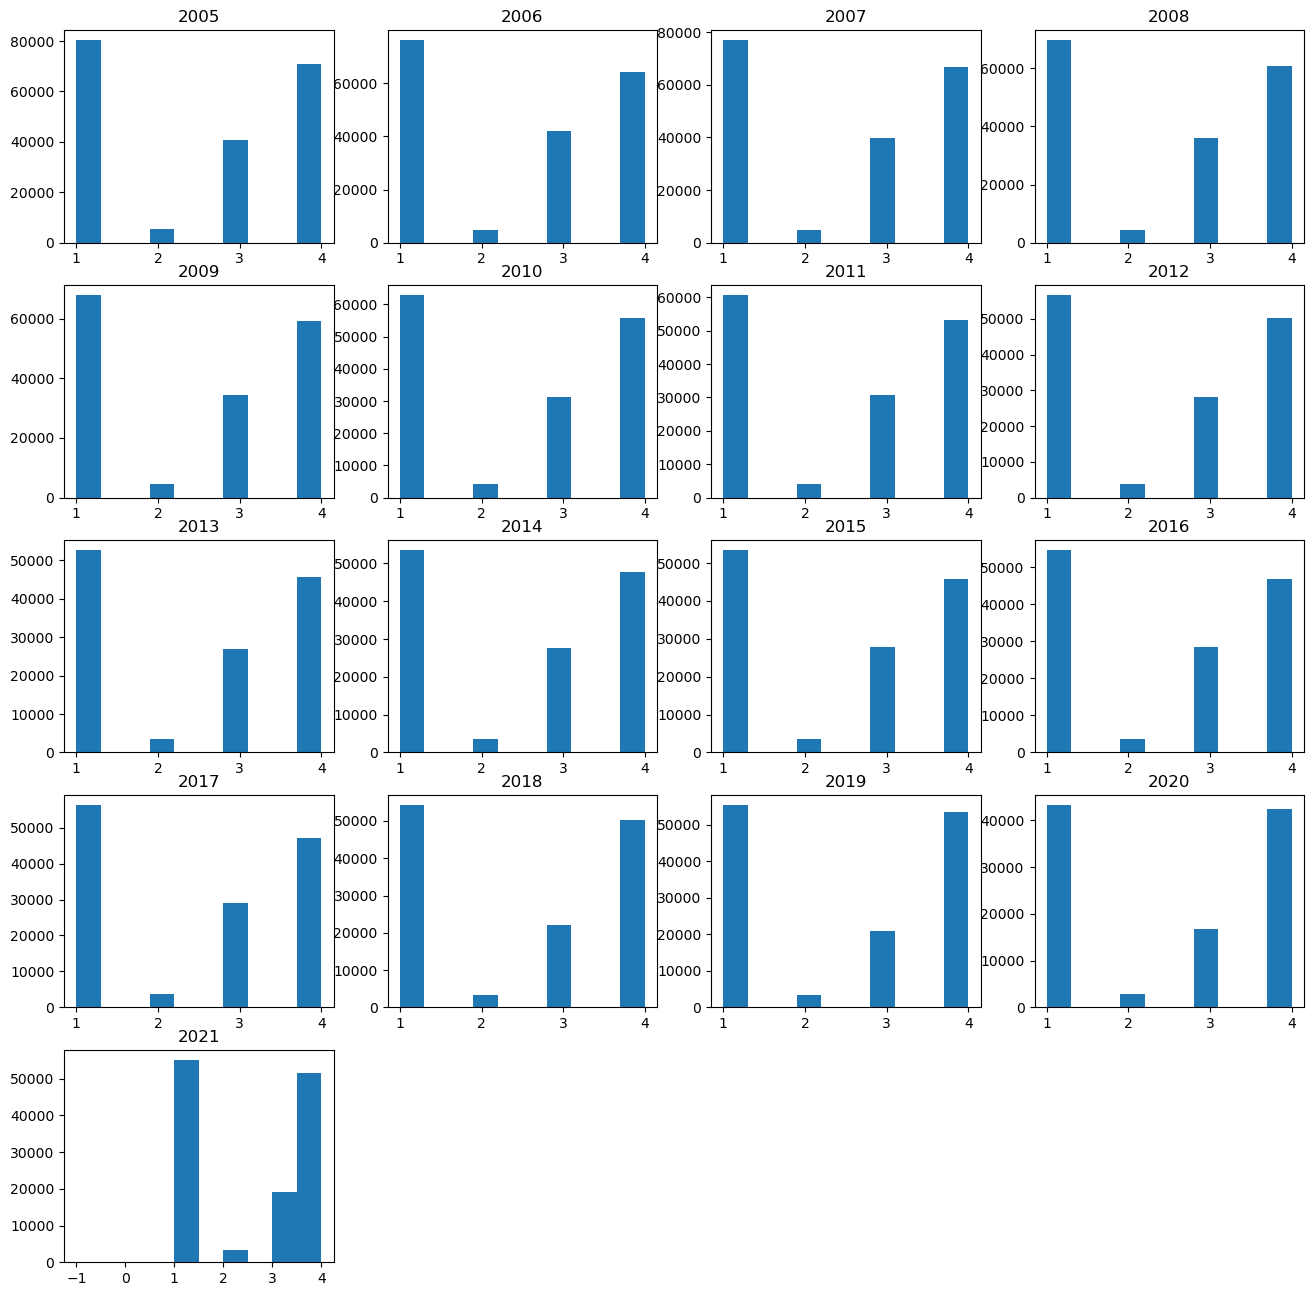

In [14]:
# Etude des fichiers usagers-yyyy.csv

# 1 : Indemne
# 2 : Tué
# 3 : Blessé hospitalisé
# 4 : Blessé léger

print("Usagers - Dimension des données selon les années : \n")
for year in range(2018, 2022):
    print(f"usagers {year} : {usagers[year].shape}")

print("\nUsagers - Variables selon les années : \n")
for year in range(2018, 2022):
    print(f"usagers {year} : {list(usagers[year].columns)}")

print("\nUsagers - Modalités de la variable grav : \n")
for year in range(2018, 2022):
    print(f"usagers {year} : {usagers[year]['grav'].value_counts()}")


plt.figure(figsize=(16, 16))
plt.title('Répartition de la gravité des accidents par année depuis 2005')
for k in range(1, 18):
    year = 2005 + k -1
    plt.subplot(5, 4, k)
    plt.hist(usagers[year].grav);
    plt.title(year)